___

# Analysez les données de votre entreprise

Source de données : OpenClassrooms

## ✓ Import des données
## ✓ Nettoyage des données
## ✓ Analyses univariées des données
## ✓ Analyses bivariées des données

___

# Part 0

## Objectif

- Import des librairies
- Création des fonctions utiles
- Import des CSV
- Création de chaque dataframe
- Création du dataframe principal
- Nettoyage du dataframe principal
- Enrichissement du dataframe principal

___

## Librairies import

In [33]:
import math
import scipy.stats as st
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from IPython.display import display
import warnings

## Jupyter Notebook settings

In [2]:
%matplotlib inline

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 1000;

<IPython.core.display.Javascript object>

## Pyplot Classes

In [4]:
# Boxplot style
class BoxPlotStyle:
        
    medianprops = {
        'color': '#fcc500',
        'linewidth': 2
    }
        
    meanprops = {
        'marker': 'o',
        'markersize': 8,
        'markeredgecolor': '#d95040',
        'markerfacecolor': '#d95040'
    }

    boxprops = {
        'color': '#3977af',
        'facecolor': '#3977af'
    }

    whiskerprops = {
        'color': '#999999',
        'linewidth': 2
    }

    capprops = {
        'color': '#999999',
        'linewidth': 2
    }

class MyPlots():
    """ A list of methods to plot beautiful plots with matplotlib.pyplot. """
    
    def new_plot(width=8, heigth=5, subplot=111):
        """ Return a new empty axe. """
        fig = plt.figure(figsize=[width, heigth])
        ax = plt.subplot(subplot)
        return fig, ax
    
    def plot_show():
        """ Plot the plots. """
        
        plt.show()
        
    # Annotations
    def annotate(ax, text, xy, xytext):
        """ Set a fancy annotation. """

        ax.annotate(
            text,
            xy=xy,
            xytext=xytext,
            arrowprops={'color': '#d95040','arrowstyle':'simple'}
        )

    #Background
    def bg(ax):
        """ Set a nice background with grid and stuff. """

        ax.set_facecolor('#ebe9f2')
        ax.grid(color='#FFFFFF', linestyle='-')

    # Title
    def title(ax, title, y=1.02):
        """ Set a fancy title. """

        fontsize = 15
        color = '#555555'
        fontweight = 'bold'

        ax.set_title(title, fontsize=fontsize, y=y, color=color, fontweight=fontweight)

    # Border
    def border(ax):
        """ Set nice graph borders. """

        for spine in ax.spines.values():
            spine.set_edgecolor('#c6c1d8')
            spine.set_linewidth(1)

    # Axe Labels
    def labels(ax, x, y):
        """ Set nice axe labels """

        ax.set_xlabel(x)
        ax.set_ylabel(y)

    # Scatterplot
    def scatter(ax, x, y):
        """ Set a wonderful scatter plot. """
        ax.plot(x, y, 'o', alpha=0.5, color="#5086ec")
        ax.set_xlabel(x.name)
        ax.set_ylabel(y.name)

    # Pie Chart
    def piechart(ax, data, var_name='Legend', unit=''):
        """ Plot a fancy Pie Chart (Donnut Style)

        Based on this code:
        https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html

        """

        ax.set_aspect('equal')

        the_labels = data.value_counts().index
        the_data = data.value_counts().values

        def func(pct, allvals):
            absolute = int(pct/100.*np.sum(allvals))
            return f"{pct:.1f}%\n({absolute:d}{unit})"


        wedges, texts, autotexts = ax.pie(
                                    the_data,
                                    wedgeprops=dict(width=0.7),
                                    autopct=lambda pct: func(pct, the_data),
                                    textprops=dict(color="w"))

        ax.legend(wedges, the_labels,
                  title=var_name,
                  loc="center left",
                  bbox_to_anchor=(1, 0, 0.5, 1),
                  fontsize=14)

        plt.setp(autotexts, size=8, weight="bold")

    # Linear regression
    def lin_reg(ax, x, y):
        """ Plot a linear regression. """

        Y = y.copy()
        X = pd.DataFrame()
        X['data'] = x.copy()
        X = X[['data']]
        X['intercept'] = 1
        result = sm.OLS(Y, X).fit()
        a, b = result.params['data'], result.params['intercept']

        xs = np.arange(min(x), max(x))
        ax.plot(xs, [a*x+b for x in xs], linewidth=4, color="#fcc500")
        ax.set_ylim(min(y), max(y))

    # Boxplot
    def boxplot(ax, data):
        """ Plot a cool boxplot """

        ax.boxplot(
            data,
            showfliers=False,
            vert=False,
            zorder=2,
            patch_artist=True,
            medianprops=dict(BoxPlotStyle.medianprops),
            meanprops=dict(BoxPlotStyle.meanprops),
            boxprops=dict(BoxPlotStyle.boxprops),
            whiskerprops=dict(BoxPlotStyle.whiskerprops),
            capprops=dict(BoxPlotStyle.capprops)
        )

        # Set background
        MyPlots.bg(ax)

        # Set borders
        MyPlots.border(ax)

        # Set xtick labels
        MyPlots.labels(ax, data.name, "Boxplot")

    # Bivariate boxplots
    def boxplots(ax, x, y, class_size=50):
        """ Plot boxplots by bin. """

        groups = []
        edges = np.arange(0, max(x), class_size) # Create the bins
        edges += class_size # Increase each bin by a class size
        indexes = np.digitize(x, edges) # Associate each value to a bin

        # Create groups by class
        for ind, edge in enumerate(edges):
            values = y.loc[indexes == ind]

            if len(values) > 0:
                group = {
                    'values': values,
                    'class_center': edge - (class_size / 2),
                    'size': len(values),
                    'quartiles': [np.percentile(values, p) for p in [25,50,75]]
                }
                groups.append(group)

        # Boxplots
        ax.boxplot(
            [g["values"] for g in groups],
            positions=[g["class_center"] for g in groups],
            widths=class_size*0.7,
            patch_artist=True,
            showfliers=False,
            medianprops=dict(BoxPlotStyle.medianprops),
            meanprops=dict(BoxPlotStyle.meanprops),
            boxprops=dict(BoxPlotStyle.boxprops),
            whiskerprops=dict(BoxPlotStyle.whiskerprops),
            capprops=dict(BoxPlotStyle.capprops)
        )

        # Set xlabel and ylabel
        ax.set_xlabel(x.name)
        ax.set_ylabel(y.name)

        # Set correct axes values
        ax.set_xlim(0, max(edges))
        ax.set_ylim(0)

        # Classes size
        for g in groups:
            ax.text(g['class_center'],
                    0, f"(n={g['size']})",
                    horizontalalignment='center',
                    verticalalignment='top'
                   )

        # Put space between xtick labels and the axe
        ax.tick_params(axis='x', which='major', pad=10)

    # ANOVA
    def anova(ax, x, y):
        """ Plot boxplots by modality. """

        mods = x.drop_duplicates().sort_values()
        groups = []

        for m in mods:
            groups.append(y[x == m])


        ax.boxplot(groups,
                   labels=mods,
                   showfliers=False,
                   vert=False,
                   patch_artist=True,
                   showmeans=True,
                   medianprops=dict(BoxPlotStyle.medianprops),
                   meanprops=dict(BoxPlotStyle.meanprops),
                   boxprops=dict(BoxPlotStyle.boxprops),
                   whiskerprops=dict(BoxPlotStyle.whiskerprops),
                   capprops=dict(BoxPlotStyle.capprops)
                  )

    # Histogram
    def hist(ax, data, bins, color='#3977af'):
        """ Plot a pretty histogram """

        histtype = 'bar'
        color = color
        edgecolor = color
        ax.hist(data, bins=bins, histtype=histtype, color=color, edgecolor=color, alpha=0.5, zorder=2)

        # Set background
        MyPlots.bg(ax)

        # Set borders
        MyPlots.border(ax)

        # Set labels
        MyPlots.labels(ax, data.name, "Quantity")

    # Bar Chart
    def bar(ax, data=None, step=None, x=None, y=None):
        """ Plot a rock bar """
        
        if isinstance(data, pd.Series):
            x = data.value_counts().index
            y = data.value_counts().values
            data_name_x = data.name
            data_name_y = "Quantity"
            
        else:
            data_name_x = x.name
            data_name_y = y.name

        ax.bar(x,y, tick_label=x, zorder=2)

        if step:
            new_a = []
            i = 0
            for val in x.sort_values():
                if i == 0:
                    new_a.append(val)

                if i == (step-1):
                    i = 0

                else:
                    i += 1

            ax.set_xticklabels(new_a)
            ax.set_xticks(new_a)

        # Set background
        MyPlots.bg(ax)

        # Set borders
        MyPlots.border(ax)

        # Set labels
        MyPlots.labels(ax, data_name_x, data_name_y)

    # Lorenz Curve
    def lorenz(ax, data):
        """ Plot a Lorenz Curve """

        # Order the data
        l_data = np.sort(data)

        # Y axe: Cumsum, from 0 to 1
        l_y = np.cumsum(l_data) / l_data.sum()
        l_y = np.append([0], l_y)

        # X axe: Linspace, from 0 to 1
        l_x = np.linspace(0, 1, len(l_y))

        ax.fill_between(l_x, l_y, zorder=2)
        ax.fill_between(l_x, l_x, l_y, zorder=2, color='#3977af', alpha=0.5)

        median = l_y[int(round(len(l_y)) / 2)]
        ax.plot([0.5, 0.5], [0, median], color='#fcc500', linestyle=':', linewidth=2, label="Median")
        ax.plot([0, 0.5], [median, median], color='#fcc500', linestyle=':', linewidth=2)

        medial = len(l_y[l_y <= 0.5]) / len(l_y)
        ax.plot([0, medial], [0.5, 0.5], color='#f70028', linestyle=':', linewidth=2, label="Medial")
        ax.plot([medial, medial], [0, 0.5], color='#f70028', linestyle=':', linewidth=2)

        ax.plot([0, 1], [0, 1], color='#999999', linestyle='-', linewidth=1)
        ax.plot([0, 1], [0, 0], color='#999999', linestyle='-', linewidth=1)
        ax.plot([1, 1], [0, 1], color='#999999', linestyle='-', linewidth=1)

        # Set legend
        ax.legend()

        # Set borders
        MyPlots.border(ax)

        # Set labels
        MyPlots.labels(ax, "Products", "Wealth")

        # Set background
        MyPlots.bg(ax)

## Univariate Analysis Class

In [5]:
class Univa():
    """ A class to realize univariate anlysis. """
    
    #################
    # Class Methods #
    #################
        
    def gini(data):
        """ Compute the Gini Coefficient. """

        l_data = np.sort(data)

        lorenz = np.cumsum(l_data) / l_data.sum()
        lorenz = np.append([0], lorenz)

        area_under_curve = lorenz[:-1].sum() / len(lorenz)
        S = 0.5 - area_under_curve
        gini = 2*S

        return gini
    
    ####################
    # Instance methods #
    ####################
    
    def __init__(self, variable, quali=False, discrete=False, unit='', filter_var=[]):
        """ The class constructor. Just the variable is mandatory. """
        
        self.variable = variable
        self.quali = quali
        self.discrete = discrete
        self.unit = unit
        self.filter_var = filter_var
        
        if isinstance(self.filter_var, pd.Series):
            self.cond_list = self.filter_var.drop_duplicates().sort_values()
        
        # Set the filter on the complete data
        self.reset_filter()
        
    def check_annotation(self, ax, **kwargs):
        """ Check if an annotation has to be implemented. """
        
        if ('annotate' in kwargs):
            if kwargs['annotate']['plot_name'] == self.filter_name:
                text = kwargs['annotate']['text']
                xy = kwargs['annotate']['xy']
                xytext = kwargs['annotate']['xytext']
                MyPlots.annotate(ax, text, xy=xy, xytext=xytext)
        
    def set_filter(self, condition):
        """ Set a filter based on a value that we can
         find in the filter variable. """
        
        self.filter_name = f"{self.filter_var.name}={condition}"
        self.filtered_data = self.variable[self.filter_var == condition]
        
    def reset_filter(self):
        """ Set the filter to the complete data. """
        
        self.filter_name = self.variable.name
        self.filtered_data = self.variable
        
    def describe_compute(self):
        """ Compute the variable description. """
        
        desc_var = self.filtered_data
        columns = [self.filter_name]
        
        if self.quali:
            index = ['Mode']
            data = [f"{desc_var.mode().iloc[0]}{self.unit}"] 

        else:
            index = [
                'Sample Size',
                'Total',
                'Min',
                'Max',
                'Mode',
                'Mean',
                'Median',
                'Variance (σ²)',
                'Standard Deviation (σ)',
                'Coefficient of variation (CV)',
                'Skewness',
                'Kurtosis'
            ]

            data = [
                f"{len(desc_var):,.0f}",
                f"{desc_var.sum():,.0f}{self.unit}",
                f"{desc_var.sort_values().iloc[0]}{self.unit}",
                f"{desc_var.sort_values().iloc[-1]}{self.unit}",
                f"{desc_var.mode().iloc[0]:.0f}{self.unit}",
                f"{desc_var.mean():.0f}{self.unit}",
                f"{desc_var.median():.0f}{self.unit}",
                f"{desc_var.var():.2f}{self.unit}",
                f"{desc_var.std():.2f}{self.unit}",
                f"{desc_var.std() / self.variable.mean():.2f}",
                f"{desc_var.skew():.2f}",
                f"{desc_var.kurtosis():.2f}"
            ]

        my_s = pd.DataFrame(index=index, data=data, columns=columns)
        
        return my_s
        
    def describe(self):
        """ Describe the variable as Pandas does. """
        
        if len(self.filter_var) > 0: # A describtion filtered by values of the specified column
            
            # The first dataframe column is the non filtered data
            self.reset_filter()
            final_df = self.describe_compute()
            
            # Then the other columns are the filtered data
            for condition in self.cond_list:
                self.set_filter(condition)
                desc = self.describe_compute()
                final_df = pd.concat([final_df, desc], axis=1)
                
            display(final_df)
                
        else: # Just a regular describe
            display(self.describe_compute())
            
    def distribution_compute(self, ax, step, bins, **kwargs):
        """ Compute the variable distribution. """

        data = self.filtered_data
        plot_name = self.filter_name   
        
        if self.discrete or self.quali:
            MyPlots.bar(ax, data, step)
            MyPlots.title(ax, f"{plot_name} - Bar Chart")
            
            if (len(self.variable.drop_duplicates()) > 5):
                plt.xticks(rotation=45)

        else:
            if not bins: # Sturges Rule
                bins = round(1 + math.log(len(data), 2))
                
            MyPlots.hist(ax, data, bins)
            MyPlots.title(ax, f"{plot_name} - Histogram (bins = {bins})")
            
        self.check_annotation(ax, **kwargs)
            
    def distribution(self, bins=None, step=None, **kwargs):
        """ Plot the variable distribution. """
            
        if len(self.filter_var) > 0:
            for condition in self.cond_list:
                fig, ax = MyPlots.new_plot()
                self.set_filter(condition)
                self.distribution_compute(ax, step, bins, **kwargs)
                
        else:
            fig, ax = MyPlots.new_plot()
            self.distribution_compute(ax, step, bins, **kwargs)
        
        MyPlots.plot_show()
        
    def piechart_compute(self, ax):
        """ Compute a Pie Chart distribution. """

        desc_var = self.filtered_data
        plot_name = self.filter_name
        
        MyPlots.piechart(ax, desc_var, var_name=plot_name, unit=self.unit)
        MyPlots.title(ax, f"{plot_name} - Pie Chart Distribution")
        MyPlots.border(ax)
        
    def piechart(self):
        """ Plot a Pie Chart distribution. """

        if len(self.filter_var) > 0:
            for condition in self.cond_list:
                self.set_filter(condition)
                fig, ax = MyPlots.new_plot()
                self.piechart_compute(ax)
                
        else:
            fig, ax = MyPlots.new_plot()
            self.piechart_compute(ax)
            
        MyPlots.plot_show()
        
    def boxplot_compute(self, ax):
        """ Compute a boxplot. """
        
        if not self.quali:
            data = self.filtered_data
            plot_name = self.filter_name   
            MyPlots.boxplot(ax, data)
            MyPlots.title(ax, f"{plot_name} - Boxplot (without outliers)")
            
    def boxplot(self):
        """ Plot a boxplot. """
        
        if len(self.filter_var) > 0:
            for condition in self.cond_list:
                self.set_filter(condition)
                fig, ax = MyPlots.new_plot()
                self.boxplot_compute(ax)
                
        else:
            fig, ax = MyPlots.new_plot()
            self.boxplot_compute(ax)
            
        MyPlots.plot_show()
        
    def lorenz_compute(self, ax):
        """ Compute a Lorenz Curve. """
        
        if not self.quali:
            data = self.filtered_data
            plot_name = self.filter_name           

            MyPlots.lorenz(ax, data)
            gini_var = round(Univa.gini(data),2)
            MyPlots.title(ax, f"Lorenz Curve - {plot_name} (Gini: {gini_var})")
            
    def lorenz(self):
        """ PLot a Lorenz Curve. """
           
        if len(self.filter_var) > 0:
            for condition in self.cond_list:
                self.set_filter(condition)
                fig, ax = MyPlots.new_plot()
                self.lorenz_compute(ax)
        else:         
            fig, ax = MyPlots.new_plot()
            self.lorenz_compute(ax)
        
        MyPlots.plot_show()

## Bivariate Analysis Class

In [6]:
class Biva():
    """ A class to compute and plot bivariate analysis. """
    
    
    #################
    # Class Methods #
    #################
    
    def eta_squared(x, y):
        """ Compute and Return Eta Squared. """

        y_mean = y.mean()
        classes = []

        for the_class in x.unique():
            yi_class = y[x == the_class]
            classes.append({'ni': len(yi_class),
                            'mean': yi_class.mean()})

        SCT = sum([(yj - y_mean)**2 for yj in y])
        SCE = sum([c['ni'] * (c['mean'] - y_mean)**2 for c in classes])

        return SCE / SCT
    
    ####################
    # Instance methods #
    ####################
    
    def __init__(self, x, y, type_x='quanti', type_y='quanti', x_class_size=50):
        """ Init instance. """
        
        self.x = x
        self.y = y
        self.type_x = type_x
        self.type_y = type_y
        self.x_class_size = x_class_size
    
    def describe(self):
        """ Return classic indexes. """
        
        if (self.type_x == 'quanti') and (self.type_y == 'quanti'):

            # R² - Pearson (Or correlation) Coefficient
            coefcor = st.pearsonr(self.x, self.y)[0]
            print(f"Correlation Coefficient (R²): {coefcor:.2f}")

            # σxy - Covariance
            covariance = np.cov(self.x, self.y)[0][1]
            print(f"Covariance (σxy): {covariance:.2f}")
            
        if (self.type_x == 'quali') and (self.type_y == 'quanti'):
            
            # η2 - Eta Squared
            print(f"Eta Squared (η2): {Biva.eta_squared(self.x, self.y):.2f}")
            
        if (self.type_x == 'quali' and (self.type_y == 'quali')):
            
            # χ² - Khi-2
            khi2 = self.khi2(contin=False, heatmap=False)
            print(f"Khi2 (χ²): {khi2:.0f}")
            
            
    def scatterplot(self, linreg=True, **kwargs):
        """ Plot a scatter plot + a linear regression. """

        if (self.type_x == 'quanti') and (self.type_y == 'quanti'):
            fig, ax = MyPlots.new_plot(**kwargs)
            MyPlots.scatter(ax, self.x, self.y)
            MyPlots.bg(ax)
            MyPlots.title(ax, f'Scatter Plot: [{self.x.name}] vs [{self.y.name}]')
            MyPlots.border(ax)
        
            if linreg:
                MyPlots.lin_reg(ax, self.x, self.y)
            
        MyPlots.plot_show()
            
    def boxplots(self, **kwargs):
        """ Plot boxplots for a quanti-quanti analysis. """
        
        if (self.type_x == 'quanti') and (self.type_y == 'quanti'):
            fig, ax = MyPlots.new_plot(**kwargs)
            MyPlots.boxplots(ax, self.x, self.y, class_size=self.x_class_size)
            MyPlots.bg(ax)
            MyPlots.border(ax)
            MyPlots.title(ax, f"[{self.y.name}] boxplots by [{self.x.name}] class")
            
            MyPlots.plot_show()
            
    def anova(self, **kwargs):
        """ Compute and plot an ANOVA analysis. """
        
        if (self.type_x == 'quali') and (self.type_y == 'quanti'):
            fig, ax = MyPlots.new_plot(**kwargs)
            MyPlots.anova(ax, self.x, self.y)
            MyPlots.bg(ax)
            MyPlots.title(ax, f"Analysis of Variance (η2 = {Biva.eta_squared(self.x, self.y):.2f})")
            MyPlots.border(ax)
            MyPlots.labels(ax, self.y.name, self.x.name)
            MyPlots.plot_show()
            
    def khi2(self, contin=False, heatmap=False, width=5, heigth=10):
        """ Compute a khi2 test. """

        dftemp = pd.concat([self.x, self.y], axis=1)

        X = self.x.name
        Y = self.y.name

        dfpivot = dftemp[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, fill_value=0)

        tx = dftemp[X].value_counts()
        ty = dftemp[Y].value_counts()
        
        if contin:
            dfpivot.loc[:, "Total"] = tx
            dfpivot.loc["total", :] = ty
            dfpivot.loc["total", "Total"] = len(dftemp)
            contin_table = dfpivot.copy()
            dfpivot = dfpivot.drop('total').drop('Total', axis=1)

        tx = pd.DataFrame(tx)
        ty = pd.DataFrame(ty)

        tx.columns = ["c"]
        ty.columns = ["c"]
        n = len(dftemp)

        indep = tx.dot(ty.T) / n

        measure = ((dfpivot - indep)**2) / indep
        xi_n = measure.sum().sum()
        
        # Print Khi-2
        if (contin == False) and (heatmap == False):
            return xi_n
        else:
            print(f"χ² : {xi_n:.0f}")
        
        # Print Contingence Table
        if contin:
            display(contin_table)
        
        # Print heatmap
        if heatmap:
            fig = plt.figure(figsize=(width,heigth))
            plot = sns.heatmap(measure / xi_n, annot=dfpivot)
            plot = plt.title(f"Khi-2 = {xi_n:.0f} - Between {self.x.name} and {self.y.name}")
            plt.show()

## Cleaning functions

In [7]:
def empty_val(df):
    """ Return empty values for each column of the dataframe. """
    
    data = df.copy()
    
    for column in df.columns:
        data = data[data[column].astype(str).str.len() < 1]
        
    return data

## Products Table

In [8]:
products_df = pd.read_csv('data/products.csv')
display(products_df.head(10))

products_lp = products_df.price.sort_values().iloc[0]
products_mp = products_df.price.sort_values().iloc[-1]

print(f"""
Lower price: {products_lp}
Max price: {products_mp}

""")

print("Rows with an empty value:")
display(empty_val(products_df))
print("")
print("Zero and negative prices:")
display(products_df.query("price <= 0"))

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0



Lower price: -1.0
Max price: 300.0


Rows with an empty value:


,id_prod,price,categ



Zero and negative prices:


,id_prod,price,categ
731,T_0,-1.0,0


## Transactions Table

In [9]:
transactions_df = pd.read_csv('data/transactions.csv')
display(transactions_df.head())

transactions_od = transactions_df.date.sort_values().iloc[1]
transactions_nd = transactions_df.date.sort_values().iloc[-1]

print(f"""
Oldest date: {transactions_od}
Newest date: {transactions_nd}

""")

print("Wrong dates:")

wrong_dates = transactions_df[transactions_df.date.str.contains("test")].copy()
print(f"{len(wrong_dates)} rows")
print("")
print("Wrong dates Sessions ID:")
display(wrong_dates['session_id'].drop_duplicates())
print("Wrong dates Client ID:")
display(wrong_dates['client_id'].drop_duplicates())
print("Wrong dates Product ID:")
display(wrong_dates['id_prod'].drop_duplicates())
print("")
print("Rows with an empty value:")
display(empty_val(products_df))

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242



Oldest date: 2021-03-01 00:02:26.047414
Newest date: test_2021-03-01 02:30:02.237450


Wrong dates:
200 rows

Wrong dates Sessions ID:


1431    s_0
Name: session_id, dtype: object

Wrong dates Client ID:


1431    ct_1
5955    ct_0
Name: client_id, dtype: object

Wrong dates Product ID:


1431    T_0
Name: id_prod, dtype: object


Rows with an empty value:


,id_prod,price,categ


## Customers Table

In [10]:
customers_df = pd.read_csv('data/customers.csv')

display(customers_df.head(10))

customers_oldest = customers_df.birth.sort_values().iloc[1]
customers_youngest = customers_df.birth.sort_values().iloc[-1]
customers_se = customers_df.query("sex != 'm' & sex != 'f'")

print(f"Oldest customer: {customers_oldest}")
print(f"Youngest customer: {customers_youngest}")
print("")
print("Customers with unknowned sex:")
display(customers_se)
print("")
print("Rows with an empty value:")
display(empty_val(products_df))

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
5,c_415,m,1993
6,c_285,f,1967
7,c_160,f,1978
8,c_6446,m,1971
9,c_6866,m,1993


Oldest customer: 1929
Youngest customer: 2004

Customers with unknowned sex:


,client_id,sex,birth



Rows with an empty value:


,id_prod,price,categ


## Main dataframe

In [11]:
main_df = (
            # The main df is based on the transactions dataframe
            transactions_df
    
                # Merge products dataframe
                .merge(products_df, how='left', on='id_prod')
           
                # Merge customers dataframe
                .merge(customers_df, how='left', on='client_id')
)

# Check if some transactions have no join
len_null_rows = len(main_df[main_df.isnull().any(axis=1)])
print(f"Number of rows with at least an empty value: {len_null_rows}")

# Check which transaction(s) it s
len_null_products = len(main_df[main_df.isnull().any(axis=1)]['id_prod'].drop_duplicates())
print(f"Number of products with at least an empty value: {len_null_products}")
the_product = main_df[main_df.isnull().any(axis=1)]['id_prod'].drop_duplicates().iloc[0]
print(f"The product is: {the_product}")

Number of rows with at least an empty value: 103
Number of products with at least an empty value: 1
The product is: 0_2245


In [12]:
main_df = (
            # The main df is based on the transactions dataframe
            transactions_df
    
                # Merge products dataframe
                .merge(products_df, how='left', on='id_prod')
           
                # Merge customers dataframe
                .merge(customers_df, how='left', on='client_id')
                
                # Clean date (remove "test" dates)
                .query("date.str.contains('test') == False")
    
                # Clean prices (remove 0 and negative prices)
                .query("price > 0")
    
                # Convert data column to datetime type
                .assign(
                    date = lambda x: pd.to_datetime(x.date),
                    categ = lambda x: x.categ.astype(int)
                )
          )

# Create a year column
main_df['year'] = main_df.date.apply(lambda x: x.year)

# Create a month column
main_df['month'] = main_df.date.apply(lambda x: x.month)

# Create a yearmonth column
main_df['yearmonth'] = main_df.date.apply(lambda x: int(str(x.year) + str(x.month).zfill(2)))

# Create a age column
main_df['age'] = 2022 - main_df.birth.astype(int)

# Main DF length
print(f"Len main_df: {len(main_df):,}")

display(main_df.head(10))

Len main_df: 336,713


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,yearmonth,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0,f,1977,2021,4,202104,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2,f,2000,2022,2,202202,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1,f,1979,2021,9,202109,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0,m,1963,2021,10,202110,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0,f,1980,2021,7,202107,42
5,0_1085,2021-09-15 05:47:48.215162,s_90139,c_2526,3.99,0,f,1982,2021,9,202109,40
6,0_1508,2021-08-29 05:39:01.055455,s_82100,c_5799,8.03,0,f,1962,2021,8,202108,60
7,0_1627,2021-09-19 14:54:52.410362,s_92294,c_1422,3.99,0,f,1980,2021,9,202109,42
8,0_1469,2022-02-03 07:13:22.559995,s_159252,c_2207,14.99,0,f,1970,2022,2,202202,52
9,0_1453,2022-02-26 09:03:10.571665,s_171098,c_5433,7.99,0,f,1981,2022,2,202202,41


In [13]:
print("Rows with an empty cell:")
display(empty_val(main_df))
print("Columns with a null cell:")
display(main_df.isnull().any())

Rows with an empty cell:


,id_prod,date,session_id,client_id,price,categ,sex,birth,year,month,yearmonth,age


Columns with a null cell:


id_prod       False
date          False
session_id    False
client_id     False
price         False
categ         False
sex           False
birth         False
year          False
month         False
yearmonth     False
age           False
dtype: bool

# Part 1

## Objectifs

Réalisez une analyse univariée pour l'ensemble des variables du dataframe principal :

- Category
- Price
- Date
- Sexe
- Birth
- Age

---

## Category variable - Volume

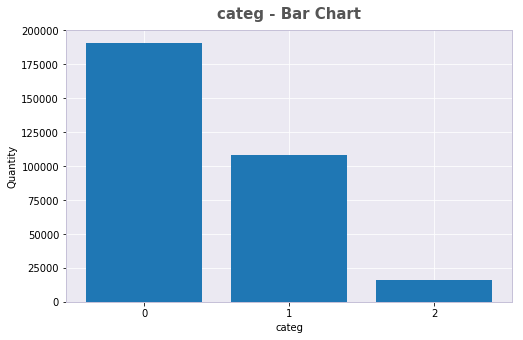

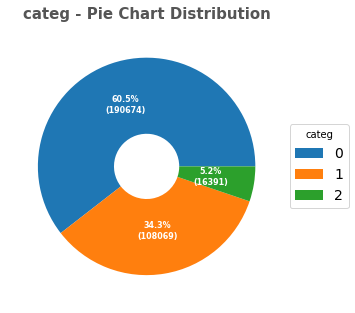

Category 0: 190,675
Category 1: 108,069
Category 2: 16,392


In [14]:
data = main_df[main_df['yearmonth'] != 202110].copy()['categ']

# Distribution
categ_univa = Univa(data, quali=True)
categ_univa.distribution()
categ_univa.piechart()

# Values
print(f"Category 0: {data[data == 0].count():,.0f}")
print(f"Category 1: {data[data == 1].count():,.0f}")
print(f"Category 2: {data[data == 2].count():,.0f}")

## Category Variable - Value

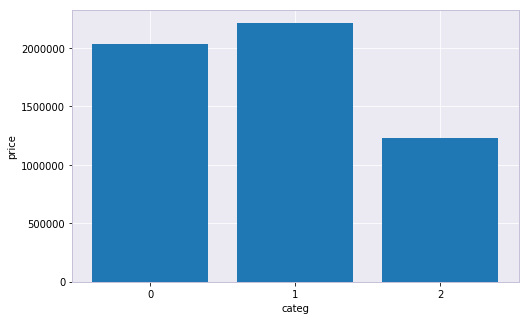

In [15]:
data = (main_df[main_df['yearmonth'] != 202110]
            .copy()
            .groupby('categ')
            .sum()
            .reset_index()
       )

# Distribution
fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=data['categ'], y=data['price'])
#repere
#data

## Price variable

,price
Sample Size,"336,713"
Total,"5,796,578€"
Min,0.62€
Max,300.0€
Mode,16€
Mean,17€
Median,14€
Variance (σ²),318.82€
Standard Deviation (σ),17.86€
Coefficient of variation (CV),1.04


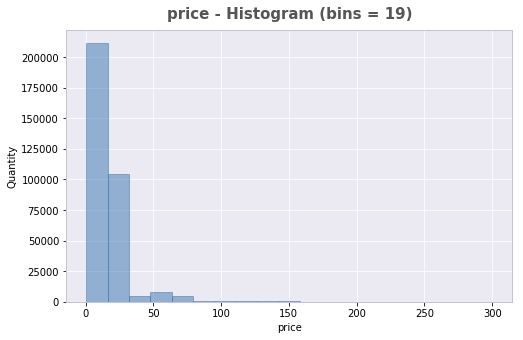

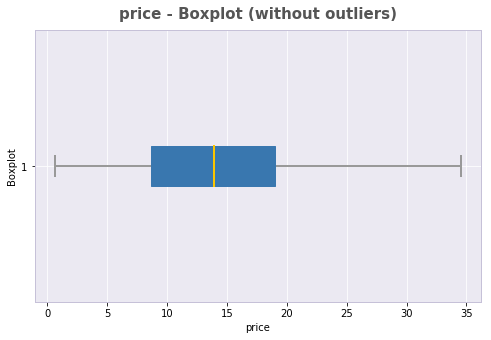

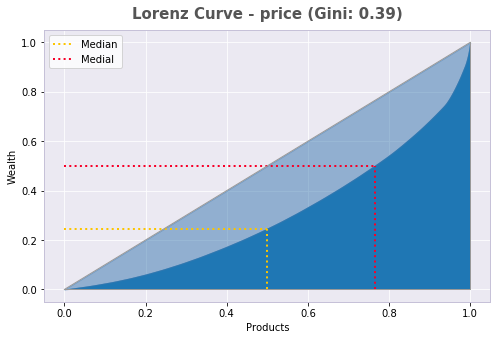

In [16]:
price_univa = Univa(main_df['price'], unit='€')
price_univa.describe()
price_univa.distribution()
price_univa.boxplot()
price_univa.lorenz()

## Price variable filtered by category

,price,categ=0,categ=1,categ=2
Sample Size,"315,136","190,675","108,069","16,392"
Total,"5,477,418€","2,030,505€","2,213,622€","1,233,291€"
Min,0.62€,0.62€,2.0€,30.99€
Max,300.0€,40.99€,80.99€,300.0€
Mode,16€,5€,16€,69€
Mean,17€,11€,20€,75€
Median,14€,10€,19€,63€
Variance (σ²),319.15€,24.33€,57.41€,1536.34€
Standard Deviation (σ),17.86€,4.93€,7.58€,39.20€
Coefficient of variation (CV),1.03,0.28,0.44,2.26


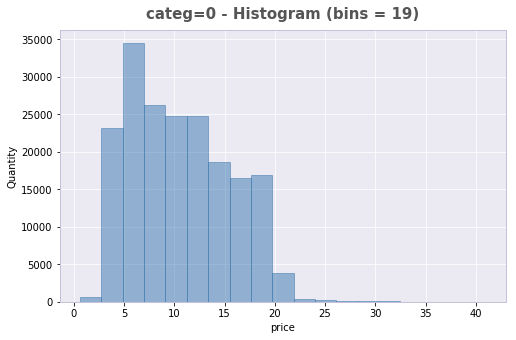

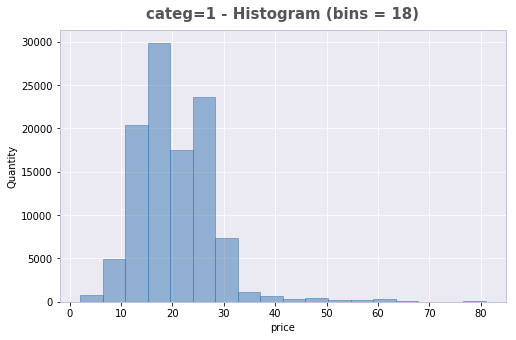

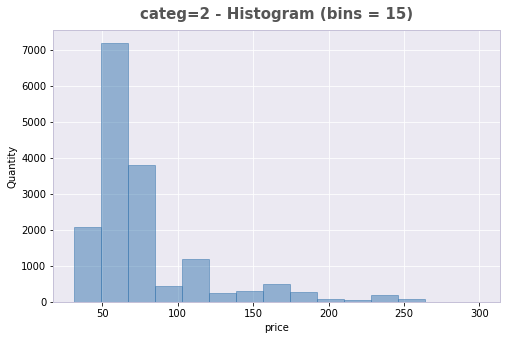

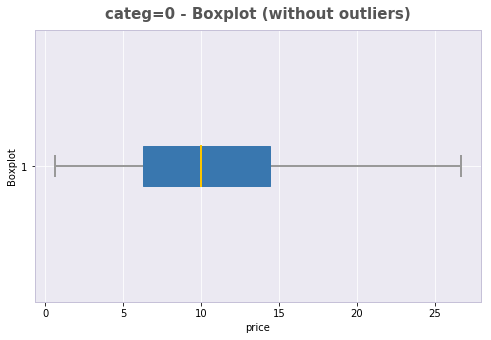

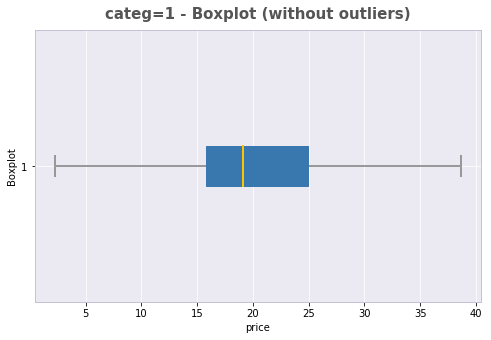

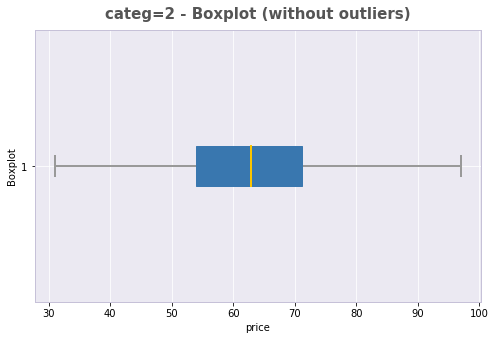

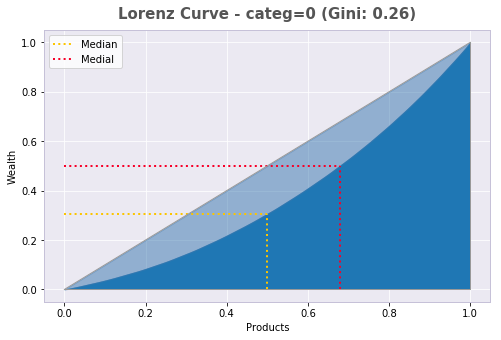

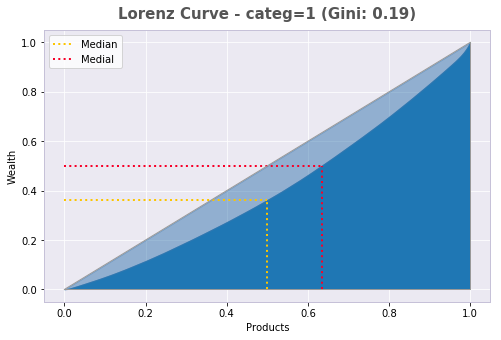

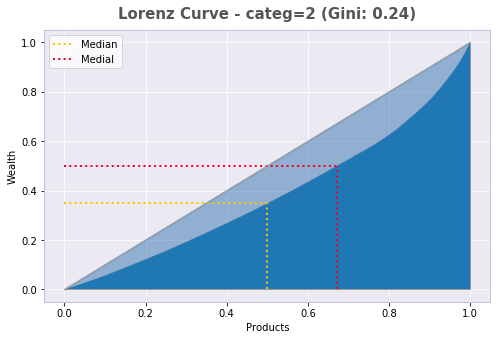

In [17]:
temp_df = main_df[main_df.yearmonth != 202110]

price_by_cat_univa = Univa(temp_df['price'], filter_var=temp_df['categ'], unit='€')
price_by_cat_univa.describe()
price_by_cat_univa.distribution()
price_by_cat_univa.boxplot()
price_by_cat_univa.lorenz()

## YearMonth Variable

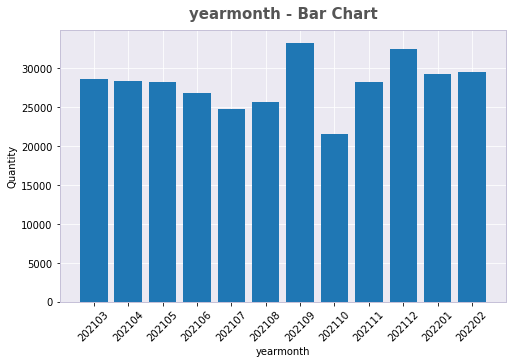

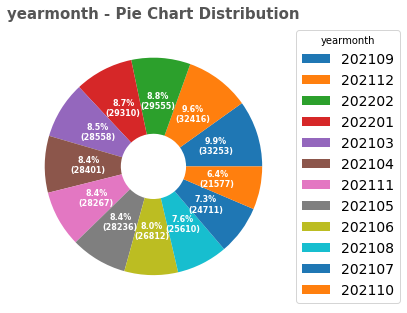

In [18]:
data = main_df['yearmonth'].astype(str)
yearmonth_univa = Univa(data, quali=True)
yearmonth_univa.distribution()
yearmonth_univa.piechart()

## YearMonth variable filtered by category

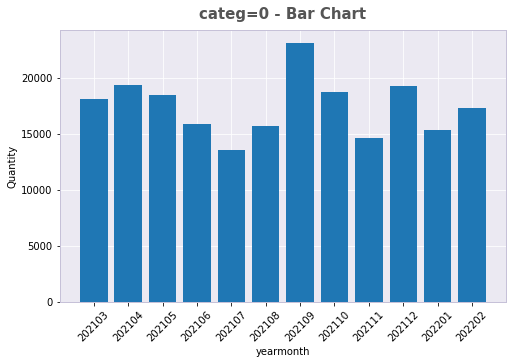

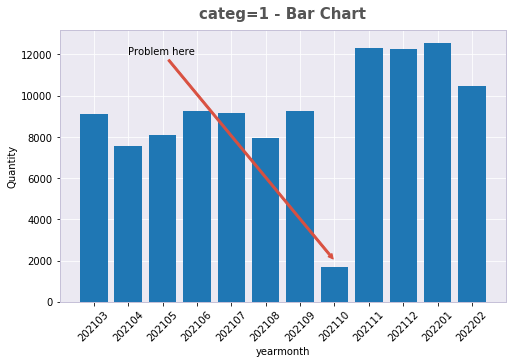

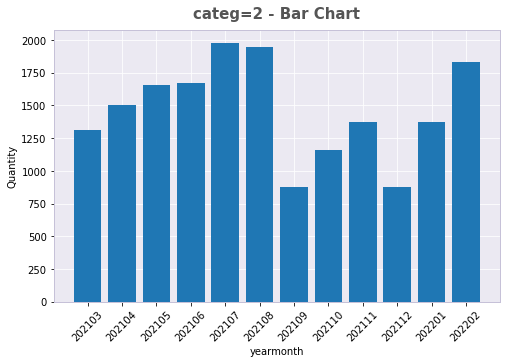

In [19]:
data = main_df['yearmonth'].astype(str)
yearmonth_by_cat_univa = Univa(data, filter_var=main_df['categ'], quali=True)

the_annotation = {
    'plot_name': 'categ=1',
    'text': 'Problem here',
    'xy': (7, 2000),
    'xytext': (1, 12000),
}

yearmonth_by_cat_univa.distribution(annotate=the_annotation)

2021-10-01 00:03:07.095422
2021-10-31 23:56:19.757517


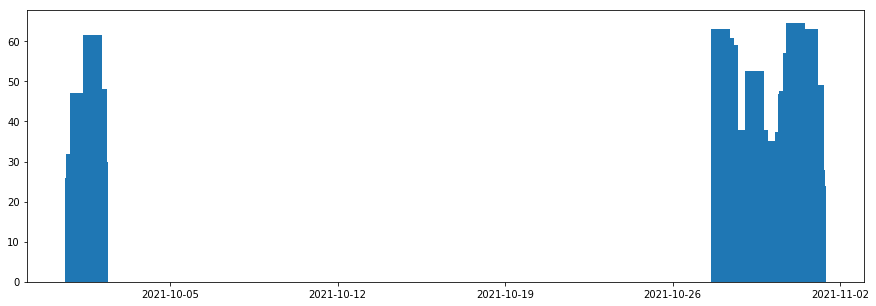

id_prod                            1_312
date          2021-10-01 23:50:02.475137
session_id                       s_98670
client_id                         c_6741
price                              24.56
categ                                  1
sex                                    f
birth                               1972
year                                2021
month                                 10
yearmonth                         202110
age                                   50
Name: 311542, dtype: object

id_prod                            1_564
date          2021-10-28 00:02:54.903656
session_id                      s_111093
client_id                          c_650
price                              62.99
categ                                  1
sex                                    f
birth                               1952
year                                2021
month                                 10
yearmonth                         202110
age                                   70
Name: 161858, dtype: object

In [20]:
# Category1: first sale in october
print(main_df[main_df['date'].dt.month == 10].query('categ == 1').sort_values(by='date').iloc[0]['date'])

# Category1: last sale in october
print(main_df[main_df['date'].dt.month == 10].query('categ == 1').sort_values(by='date').iloc[-1]['date'])


# Plot categ 1 in october
temp_df = main_df[main_df['date'].dt.month == 10].query('categ == 1').sort_values(by='date').copy()
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(temp_df['date'], temp_df['price'] )
plt.show()

# Last transaction before stoping
display(temp_df[temp_df['date'] < '2021-10-15'].sort_values(by='date').iloc[-1])

# First transaction after stoping
display(temp_df[temp_df['date'] > '2021-10-15'].sort_values(by='date').iloc[0])

## Month Variable

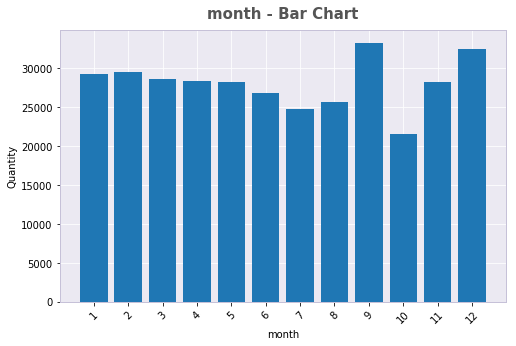

In [21]:
month_univa = Univa(main_df['month'], quali=True)
month_univa.distribution()

## Sex Variable

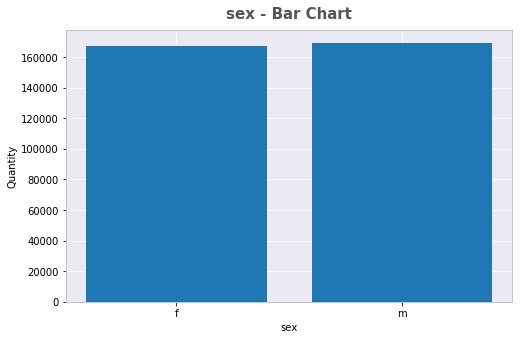

In [22]:
sex_univa = Univa(main_df['sex'], quali=True)
sex_univa.distribution()

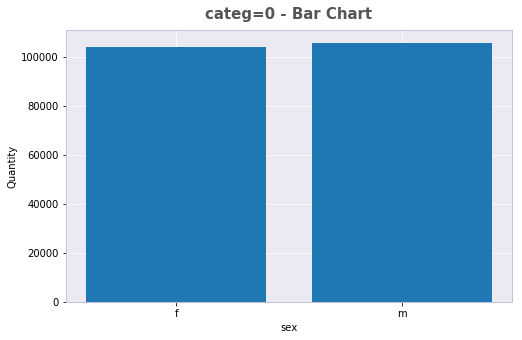

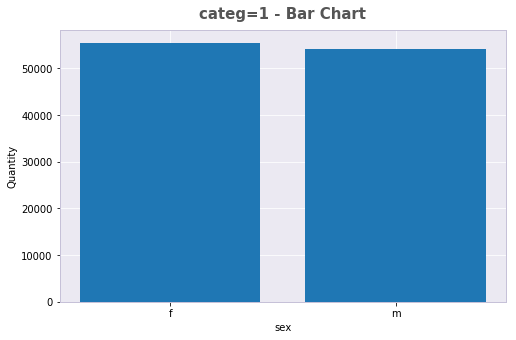

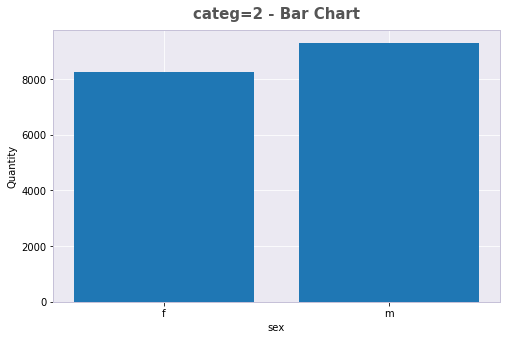

In [23]:
sex_by_cat = Univa(main_df['sex'], quali=True, filter_var=main_df['categ'])
sex_by_cat.distribution()

## Age Variable

,age
Sample Size,"336,713"
Total,"14,874,779"
Min,18
Max,93
Mode,42
Mean,44
Median,42
Variance (σ²),182.91
Standard Deviation (σ),13.52
Coefficient of variation (CV),0.31


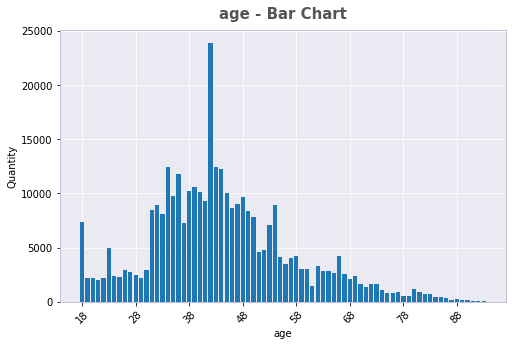

In [24]:
age_univa = Univa(main_df['age'], discrete=True)
age_univa.describe()
age_univa.distribution(step=10)

## Age variable - Focus on young people

,age
Sample Size,"38,927"
Total,"909,857"
Min,18
Max,30
Mode,18
Mean,23
Median,23
Variance (σ²),15.68
Standard Deviation (σ),3.96
Coefficient of variation (CV),0.17


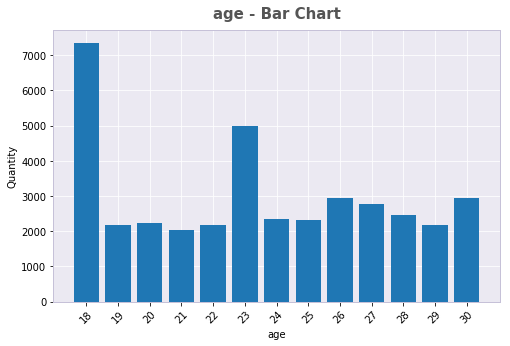

In [25]:
young_age_univa = Univa(main_df.query("age <= 30")['age'], discrete=True)
young_age_univa.describe()
young_age_univa.distribution()

# Part 2

## Objectifs

Réaliser une analyse bivariée entre les variables suivantes :

1. Sex VS Category
2. 1. Age VS Price
2. 2. Age VS Purchasing Frequency
2. 3. a. Age VS Volume
2. 3. b. Age VS products by session
2. 4. Age VS Category

Bivariate Analysis - Category VS Price
___

## 1. Bivariate Analysis - Sex VS Category

χ² : 82


categ,0,1,2,Total
sex,,,,
f,103786.0,55469.0,8260.0,167515.0
m,105640.0,54266.0,9292.0,169198.0
total,209426.0,109735.0,17552.0,336713.0


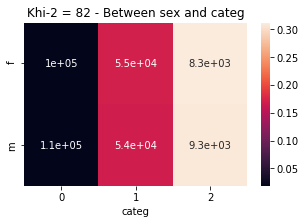

In [26]:
sex_cat_biva = Biva(main_df['sex'], main_df['categ'], type_x='quali', type_y='quali')
sex_cat_biva.khi2(contin=True, heatmap=True, heigth=3)

## Interpretation

Il y a une légère corrélation confirmée.

___

## 2. 1. Bivariate Analysis - Age VS Price

Correlation Coefficient (R²): -0.21
Covariance (σxy): -51.08


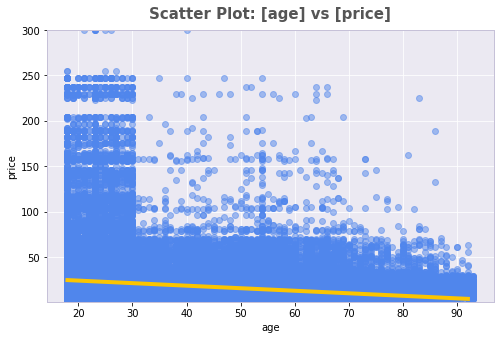

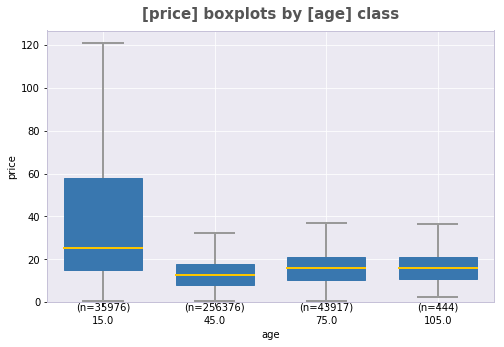

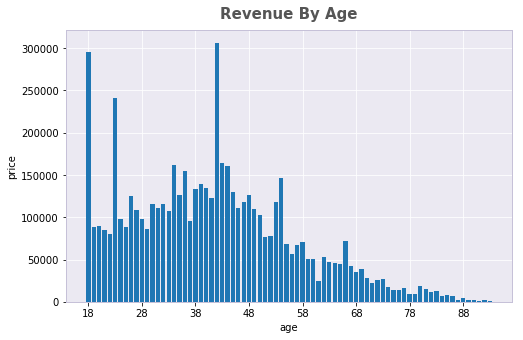

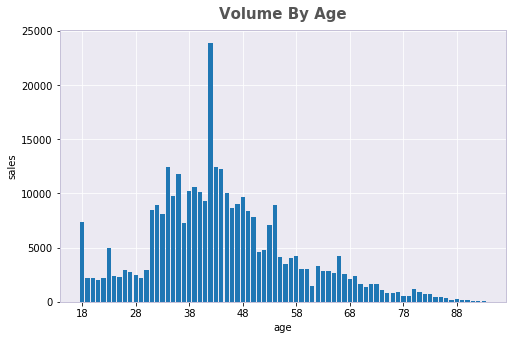

In [27]:
age_price_biva = Biva(main_df['age'], main_df['price'], x_class_size=30)
age_price_biva.describe()
age_price_biva.scatterplot()
age_price_biva.boxplots()

df = main_df[['age', 'price']].groupby('age').sum().reset_index(drop=False)
fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=df['age'], y=df['price'], step=10)
MyPlots.title(ax, "Revenue By Age")

df = (main_df[['age', 'price']]
      .groupby('age')
      .count()
      .rename(columns=dict(price='sales'))
      .reset_index().copy())

fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=df['age'], y=df['sales'], step=10)
MyPlots.title(ax, "Volume By Age")

## Interpretation

Les clients jeunes (18 - 30 ans) ont tendance à acheter des produits plus chers. On voit que c'est la tranche 18 ans et 23 ans qui fait remonter les scores.

___

## 2. 2. Bivariate Analysis - Age VS Purchasing Frequency

Correlation Coefficient (R²): 0.01
Covariance (σxy): 1.43


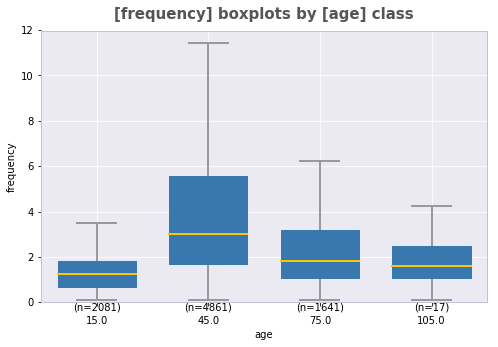

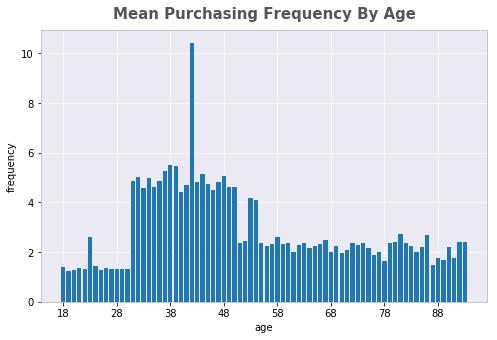

Frequency for 30-50 people: 5.0 purchasings / month


In [28]:
# Create a dataframe with the purchasing numbers by yearmonth by customer
df = (main_df[['age', 'client_id', 'yearmonth', 'price']].copy()
          
          .groupby(['client_id', 'age', 'yearmonth'])
          .count()
          .unstack()
          .fillna(0)
     )

# Compute the frequency by customer
df['total'] = df.mean(axis=1)

# Analyze of variance width age classes
df1 = (df
     .reset_index()
     .rename(columns=dict(total='frequency'))[['age', 'frequency']])

age_freq_biva = Biva(df1['age'], df1['frequency'], x_class_size=30)
age_freq_biva.describe()
age_freq_biva.boxplots()

# Mean Frequency by Age Distribution
df2 = (df['total']
          .reset_index()
          .drop('client_id', axis=1)
          .groupby('age')
          .mean()
          .reset_index()
          .rename(columns={'total': 'frequency'}))

fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=df2['age'], y=df2['frequency'], step=10)
MyPlots.title(ax, "Mean Purchasing Frequency By Age")
plt.show()

mean_freq = df2.query('age >= 30 and age <= 50').mean()['frequency']
print(f"Frequency for 30-50 people: {mean_freq:.1f} purchasings / month")

## Interpretation

Bien que la tranche d'âge des plus jeunes réalisent des paniers moyens élevés, on se rend compte ici que les achats sont peu fréquents.

La tranche d'âge qui représente la plus grande fréquence d'achats est la tranche d'age des 30 / 50 avec une moyenne à cinq achats par mois.

## 2. 3. a. Bivariate Analysis - Age VS Volume

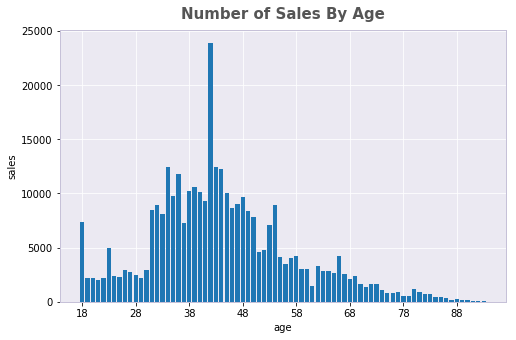

In [29]:
df = (main_df[['age', 'price']]
      .groupby('age')
      .count()
      .rename(columns=dict(price='sales'))
      .reset_index().copy())

fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=df['age'], y=df['sales'], step=10)
MyPlots.title(ax, "Number of Sales By Age")

## 2. 3. b. Bivariate Analysis - Age VS products by session

,session_id,age,products
0,s_1,55,1
1,s_10,52,1
2,s_100,44,2
3,s_1000,33,4
4,s_10000,33,3


Correlation Coefficient (R²): -0.18
Covariance (σxy): -3.37


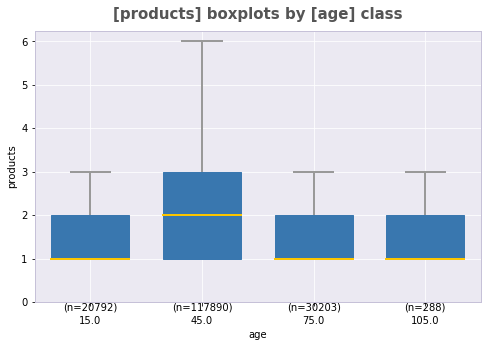

,age,products
0,18,1.757054
1,19,1.724901
2,20,1.742163
3,21,1.732310
4,22,1.842373


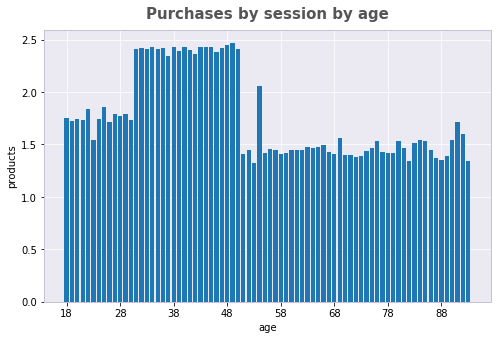

In [30]:
# Bivariate Analysis
df = (main_df[['session_id', 'age', 'price']]
      .groupby(['session_id', 'age'])
      .count()
      .reset_index()
      .rename(columns=dict(price='products'))
     )

display(df.head())

age_pbs_biva = Biva(df['age'], df['products'], x_class_size=30)
age_pbs_biva.describe()
age_pbs_biva.boxplots()

# Mean distribution
df = df.groupby('age').mean().reset_index()
display(df.head())
fig, ax = MyPlots.new_plot()
MyPlots.bar(ax, x=df['age'], y=df['products'], step=10)
MyPlots.title(ax, "Purchases by session by age")

## Interpretation

La tranche d'âge des 30-50 est celle qui réalise les achats ayant les plus grands paniers moyens en volume.

## 2. 4. Bivariate Analysis - Age VS Category

χ² : 141890


categ,0,1,2,Total
class_age,,,,
18-30,8349.0,14442.0,16136.0,38927.0
30-45,127723.0,37440.0,447.0,165610.0
45-60,54937.0,35300.0,623.0,90860.0
60-75,14559.0,17779.0,269.0,32607.0
75-90,3744.0,4605.0,75.0,8424.0
90+,114.0,169.0,2.0,285.0
total,209426.0,109735.0,17552.0,336713.0


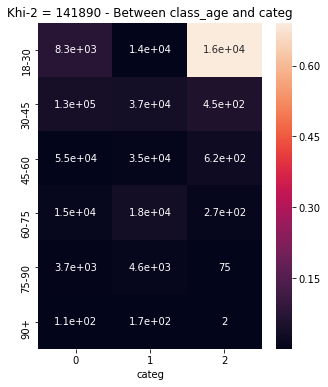

In [31]:
def class_age(x):
    if x <= 30:
        return '18-30'
    
    elif x > 30 and x <= 45:
        return '30-45'
    
    elif x > 45 and x <= 60:
        return '45-60'
    
    elif x > 60 and x <= 75:
        return '60-75'
    
    elif x > 75 and x <= 90:
        return '75-90'
    
    elif x > 90:
        return '90+'
    
main_df['class_age'] = main_df['age'].apply(lambda x: class_age(x))

categ_age_biva = Biva(main_df['class_age'], main_df['categ'], type_x='quali', type_y='quali')
categ_age_biva.khi2(contin=True, heatmap=True, heigth=6)

## Interpretation

Il y a une corrélation entre l'âge du client et la catégorie du produit acheté. Les 18-30 ans sont des gros acheteurs de produits issus de la catégorie 2.

## Bivariate Analysis - Category VS Price

Eta Squared (η2): 0.64


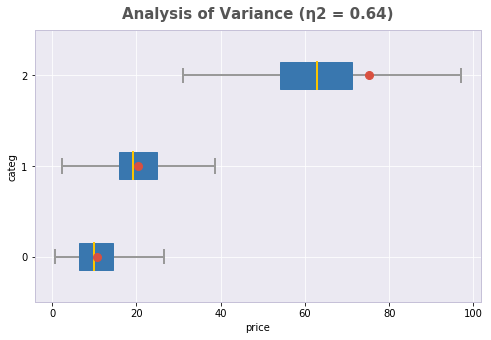

In [32]:
categ_price_biva = Biva(main_df['categ'], main_df['price'], type_x='quali')
categ_price_biva.describe()
categ_price_biva.anova()